### **Unsuccessful Attempt**
### **2 Codes Simultaneously**

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
from skimage.transform import resize

In [ ]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!")

Sample Frames Done!


In [ ]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Tests Done!")

Sample Tests Done!


In [ ]:
data = pd.read_csv('vid1.csv')
test = pd.read_csv('vid2.csv')

In [ ]:
X = []
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)
X = np.array(X)

In [ ]:
Y = []
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    Y.append(img)
Y = np.array(Y)

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image1 = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image1.append(img)
test_img1 = np.array(test_image1)

In [ ]:
from keras.utils import np_utils
train_y = np_utils.to_categorical(data.Class)
test_y = np_utils.to_categorical(test.Class)
train_b = np_utils.to_categorical(data.Class)
test_b = np_utils.to_categorical(test.Class)

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image.append(a)
X = np.array(image)

In [ ]:
image1 = []
for i in range(0,Y.shape[0]):
    a = resize(Y[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image1.append(a)
Y = np.array(image1)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
test_image1 = []
for i in range(0,test_img1.shape[0]):
    a = resize(test_img1[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image1.append(a)
test_image1 = np.array(test_image1)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')
test_image = preprocess_input(test_image, mode='tf')

In [ ]:
Y = preprocess_input(Y, mode='tf')
test_image1 = preprocess_input(test_image1, mode='tf')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)
A_train, A_valid, b_train, b_valid = train_test_split(Y, train_b, test_size=0.2, random_state=38)

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
test_image = base_model.predict(test_image)

In [ ]:
A_train = base_model.predict(A_train)
A_valid = base_model.predict(A_valid)
test_image1 = base_model.predict(test_image1)

In [ ]:
X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)
test_image = test_image.reshape(186, 7*7*512)

In [ ]:
A_train = A_train.reshape(238, 7*7*512)
A_valid = A_valid.reshape(60, 7*7*512)
test_image1 = test_image1.reshape(186, 7*7*512)

In [ ]:
train = X_train/X_train.max()
X_valid = X_valid/X_train.max()
test_image = test_image/test_image.max()

In [ ]:
train1 = A_train/A_train.max()
A_valid = A_valid/A_train.max()
test_image1 = test_image1/test_image1.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
class_weights = compute_class_weight('balanced',np.unique(data.Class), data.Class)

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), class_weight=class_weights, callbacks=callbacks_list)

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 2s 12ms/step - loss: 1.3559 - accuracy: 0.3558 - val_loss: 1.0592 - val_accuracy: 0.3667

Epoch 00001: val_loss improved from inf to 1.05924, saving model to weights.best.hdf5
Epoch 2/100
208/208 [==============================] - 2s 11ms/step - loss: 1.1674 - accuracy: 0.3702 - val_loss: 1.0632 - val_accuracy: 0.3889

Epoch 00002: val_loss did not improve from 1.05924
Epoch 3/100
208/208 [==============================] - 2s 11ms/step - loss: 1.1849 - accuracy: 0.3894 - val_loss: 1.0005 - val_accuracy: 0.5444

Epoch 00003: val_loss improved from 1.05924 to 1.00048, saving model to weights.best.hdf5
Epoch 4/100
208/208 [==============================] - 2s 11ms/step - loss: 1.0639 - accuracy: 0.4567 - val_loss: 0.9368 - val_accuracy: 0.6111

Epoch 00004: val_loss improved from 1.00048 to 0.93678, saving model to weights.best.hdf5
Epoch 5/100
208/208 [==============================] - 2s 

In [ ]:
history1 = model.fit(train1, b_train, epochs=100, validation_data=(A_valid, b_valid), class_weight=class_weights, callbacks=callbacks_list)

Train on 238 samples, validate on 60 samples
Epoch 1/100
238/238 [==============================] - 3s 11ms/step - loss: 0.1362 - accuracy: 0.9496 - val_loss: 0.1606 - val_accuracy: 0.9333

Epoch 00001: val_loss improved from 0.33637 to 0.16056, saving model to weights.best.hdf5
Epoch 2/100
238/238 [==============================] - 3s 11ms/step - loss: 0.0649 - accuracy: 0.9874 - val_loss: 0.1022 - val_accuracy: 0.9500

Epoch 00002: val_loss improved from 0.16056 to 0.10215, saving model to weights.best.hdf5
Epoch 3/100
238/238 [==============================] - 3s 11ms/step - loss: 0.0406 - accuracy: 0.9916 - val_loss: 0.1389 - val_accuracy: 0.9500

Epoch 00003: val_loss did not improve from 0.10215
Epoch 4/100
238/238 [==============================] - 3s 11ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.1068 - val_accuracy: 0.9500

Epoch 00004: val_loss did not improve from 0.10215
Epoch 5/100
238/238 [==============================] - 3s 11ms/step - loss: 0.0211 - accuracy

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
predictions = model.predict_classes(test_image)

In [ ]:
predictions1 = model.predict_classes(test_image1)

In [ ]:
print("Model 1: The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("Model 1: The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

Model 1: The screen time of JERRY is 0 seconds
Model 1: The screen time of TOM is 119 seconds


In [ ]:
print("Model 2: The screen time of JERRY is", predictions[predictions1==1].shape[0], "seconds")
print("Model 2: The screen time of TOM is", predictions[predictions1==2].shape[0], "seconds")

Model 2: The screen time of JERRY is 0 seconds
Model 2: The screen time of TOM is 119 seconds


For model 1 with test_size=0.3 and random_state=42

Accuracy : 


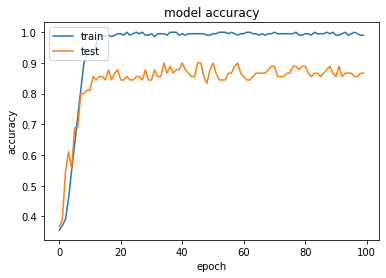

Loss : 


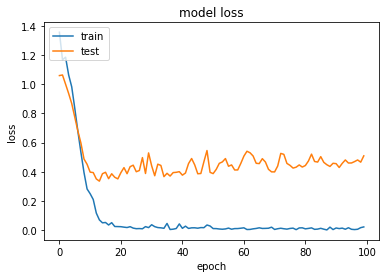

In [ ]:
print("For model 1 with test_size=0.3 and random_state=42\n\nAccuracy : ")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("Loss : ")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

For model 2 with test_size=0.2 and random_state=38
Accuracy : 


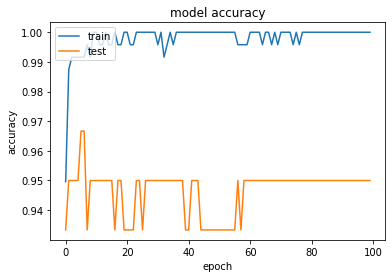

Loss : 


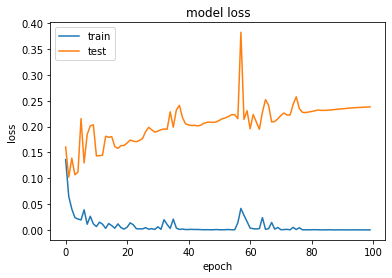

In [ ]:
print("For model 2 with test_size=0.2 and random_state=38\nAccuracy : ")
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("Loss : ")
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()